In [1]:
DATOS_DIR = 'C:/Users/Peter/Desktop/all/Facu/Mineria De Datos Usando Sistemas Inteligentes/Datos/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(DATOS_DIR + 'recorridos-realizados-2016.csv')
df.head()

C:\Users\Peter\AppData\Local\Temp\ipykernel_36468\4118554098.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATOS_DIR + 'recorridos-realizados-2016.csv')


,periodo,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,2016,M,2016-01-01 02:21:41,11,Tribunales,-58.385022,-34.601313,Tribunales,0 days 00:16:29.000000000,2016-01-01 02:48:05,5,Plaza Italia,-58.420997,-34.580127,Av. Santa Fe y Av. Sarmiento
1,2016,M,2016-01-01 08:38:19,28,Plaza Boedo,-58.412398,-34.622850,Carlos Calvo entre Virrey Liniers y Sánchez de...,0 days 00:55:26.000000000,2016-01-01 09:36:12,28,Plaza Boedo,-58.412398,-34.622850,Carlos Calvo entre Virrey Liniers y Sánchez de...
2,2016,M,2016-01-01 15:01:07,28,Plaza Boedo,-58.412398,-34.622850,Carlos Calvo entre Virrey Liniers y Sánchez de...,0 days 00:40:27.000000000,2016-01-01 16:04:15,30,Peña,-58.397378,-34.590394,Azcuénaga y Peña
3,2016,M,2016-01-01 15:14:36,5,Plaza Italia,-58.420997,-34.580127,Av. Santa Fe y Av. Sarmiento,0 days 00:45:44.000000000,2016-01-01 16:18:54,26,Juana Manso,-58.363604,-34.601001,Emma de la Barra y Juana Manso
4,2016,M,2016-01-01 15:48:51,30,Peña,-58.397378,-34.590394,Azcuénaga y Peña,0 days 00:44:09.000000000,2016-01-01 16:58:32,30,Peña,-58.397378,-34.590394,Azcuénaga y Peña


In [4]:
# Extraer la hora del atributo fecha_origen_recorrido
# Primero, convertimos la columna a datetime
df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'])

# Extraer la hora como un entero
df['hora_retiro'] = df['fecha_origen_recorrido'].dt.hour

# Mostrar las primeras filas para verificar
df[['fecha_origen_recorrido', 'hora_retiro']].head()


Datos con la nueva columna 'hora_retiro':


,fecha_origen_recorrido,hora_retiro
0,2016-01-01 02:21:41,2
1,2016-01-01 08:38:19,8
2,2016-01-01 15:01:07,15
3,2016-01-01 15:14:36,15
4,2016-01-01 15:48:51,15


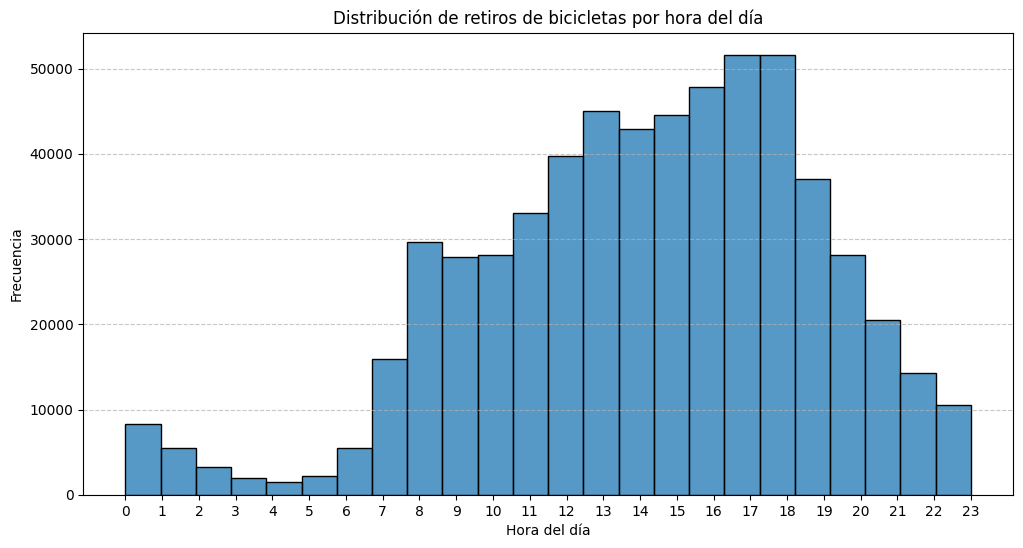


Horarios inusuales (menos del 2% de retiros):
Hora 0: 0.0140 (1.40%)
Hora 1: 0.0092 (0.92%)
Hora 2: 0.0054 (0.54%)
Hora 3: 0.0033 (0.33%)
Hora 4: 0.0025 (0.25%)
Hora 5: 0.0037 (0.37%)
Hora 6: 0.0093 (0.93%)
Hora 23: 0.0176 (1.76%)


In [8]:
# Crear un histograma de frecuencia de retiros por hora
plt.figure(figsize=(12, 6))
sns.histplot(df['hora_retiro'], bins=24, kde=False)
plt.title('Distribución de retiros de bicicletas por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular la frecuencia relativa por hora
total_retiros = len(df)
frecuencia_por_hora = df['hora_retiro'].value_counts().sort_index() / total_retiros


# Identificar horarios inusuales (por ejemplo, aquellos con menos del 2% de los retiros)
horarios_inusuales = frecuencia_por_hora[frecuencia_por_hora < 0.02]
print("\nHorarios inusuales (menos del 2% de retiros):")
for hora, freq in horarios_inusuales.items():
    print(f"Hora {hora}: {freq:.4f} ({freq*100:.2f}%)")



## Defino funcion grafico de barras

In [9]:
def diagrama_de_barras(df, columna, titulo):
    """
    Genera un gráfico de barras de la columna especificada del DataFrame.
    
    Parámetros:
        df (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna a analizar.
    """
    barras = df[columna].value_counts()
    plt.figure()
    N = len(barras)
    plt.bar(np.arange(N), barras)  # Gráfico de barras
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'{titulo}')
    # Colocamos las etiquetas del eje x
    plt.xticks(np.arange(N), barras.index)
    plt.show()

## Discretizo por frecuencia

hora_frecuencia
2    172328
1    162990
3    151045
4    110444
Name: count, dtype: int64
Rangos de los intervalos: [ 0. 11. 15. 18. 23.]


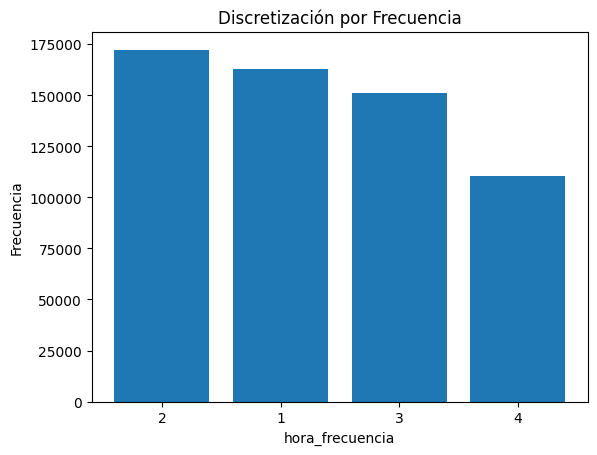

In [12]:
etiq = ["1","2", "3", "4"]

df['hora_frecuencia'], bins = pd.qcut(df["hora_retiro"], q=len(etiq), labels=etiq, retbins=True)

print(df['hora_frecuencia'].value_counts())

print(f'Rangos de los intervalos: {bins}')

diagrama_de_barras(df,'hora_frecuencia','Discretización por Frecuencia')

## Discretizo por rango

hora_rango
3    271739
4    162078
2    140205
1     22785
Name: count, dtype: int64
Rangos de los intervalos: [-0.023  5.75  11.5   17.25  23.   ]


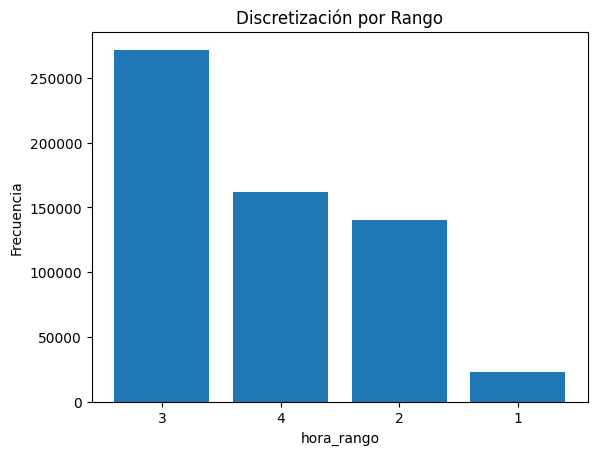

In [15]:
etiq = ["1","2", "3", "4"]

# Discretización por RANGO
df['hora_rango'], bins = pd.cut(df["hora_retiro"],bins=len(etiq),labels=etiq, retbins=True)

print(df['hora_rango'].value_counts())

print(f'Rangos de los intervalos: {bins}')

diagrama_de_barras(df,'hora_rango','Discretización por Rango')

## El C es falso por como pudimos ver